In [1]:
#数値計算ライブラリ
import numpy as np
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

#sklearnの標準化モジュールをインポート
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis as FA
from sklearn.decomposition import PCA

from scipy import stats

    parabolic  shifted forward  shifted back    gentle
0    1.000000         1.000000      3.500000  1.000000
1    0.928571         1.333333      1.416667  1.153846
2    0.500000         3.000000      3.000000  1.666667
3    1.250000         0.400000      1.388889  0.750000
4    1.000000         0.300000      4.000000  1.000000
5    1.050000         0.588235      1.428571  1.166667
6    1.000000         0.850000      1.764706  1.000000
7    0.833333         1.500000      2.857143  1.000000
8    1.250000         1.333333      1.800000  1.090909
9    1.000000         0.833333      1.363636  1.000000
10   0.981190         1.113824      2.251961  1.082809


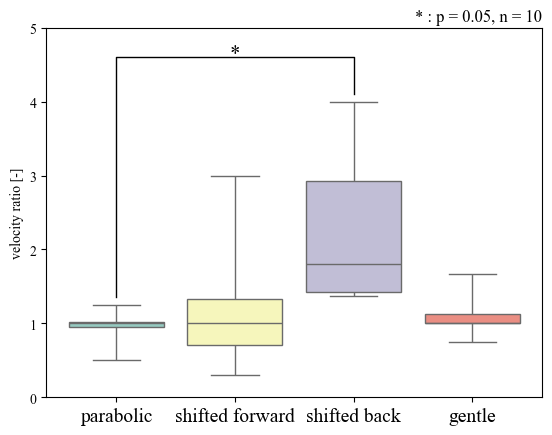

In [12]:
#Excel読み込み
df = pd.read_excel("data51.xlsx")
print(df)

# 箱ひげ図の描画（外れ値を含める設定）
sns.boxplot(data=df, palette="Set3", whis=10000 )
plt.xticks(fontsize=14)

plt.ylabel('velocity ratio [-]')
plt.ylim(0,5)

# フォントの設定
plt.rcParams['font.family'] = 'Times New Roman'

# 仮のP値とN数
p_value = 0.05  # 仮のP値
n_count = 10 # データ数 (N数)

#グラフの右上にP値とN数を表示  ** : p = {p_value*2:.2f}
plt.text(1, 1.05, f'* : p = {p_value:.2f}, n = {n_count}', 
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         fontsize=12)

# 有意差描画
# plt.plot(
#     [-0.1,-0.1,4,4], 
#     [2.0, 2.6, 2.6, 1.8],
#     color="k",
#     linewidth = 1
# )
# plt.text(
#     1.95,
#     2.6-.1,
#     "*",
#     fontsize = 15
#     , horizontalalignment="center"
#     , verticalalignment="bottom"
# )

# plt.plot(
#     [0,0,3,3], 
#     [max(df["parabolic"])+0.1, 1.1, 1.1, max(df["shifted back"])+0.1],
#     color="k",
#     linewidth = 1
# )
# plt.text(
#     1.5,
#     1.15-.1,
#     "*",
#     fontsize = 15
#     , horizontalalignment="center"
#     , verticalalignment="bottom"
# )

plt.plot(
    [0,0,2,2], 
    [max(df["parabolic"])+0.1, 4.6, 4.6, max(df["shifted back"])+0.1],
    color="k",
    linewidth = 1
)
plt.text(
    1,
    4.6-.1,
    "*",
    fontsize = 15
    , horizontalalignment="center"
    , verticalalignment="bottom"
)

# plt.plot(
#     [0.05,0.05,1,1], 
#     [max(df["parabolic"])+0.1, 4.4, 4.4, max(df["shifted forward"])+0.1],
#     color="k",
#     linewidth = 1
# )
# plt.text(
#     0.5,
#     4.4-.1,
#     "*",
#     fontsize = 15
#     , horizontalalignment="center"
#     , verticalalignment="bottom"
# )


#svgで保存
plt.savefig('sokudohi10.svg', bbox_inches="tight", transparent = True)

plt.show()

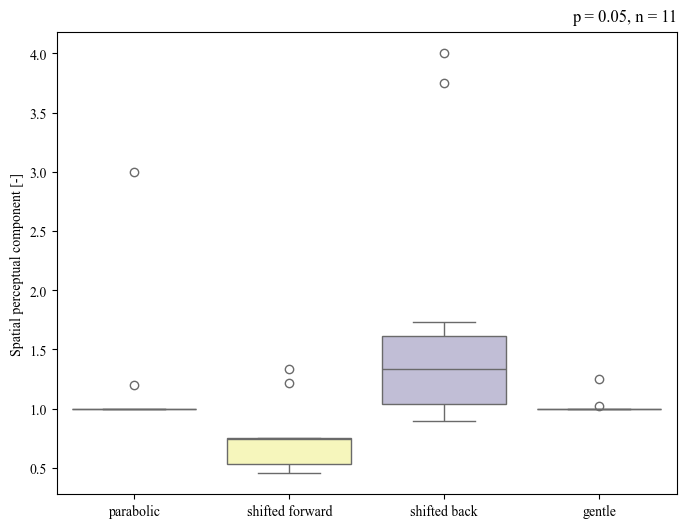

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Excel読み込み
df = pd.read_excel("data51.xlsx")

# 箱ひげ図の描画（外れ値をひげの範囲に含める）
plt.figure(figsize=(8, 6))

# 箱ひげ図のプロット（whis=1.5 を適用しつつ、外れ値をヒゲの範囲に統合）
boxplot = sns.boxplot(data=df, palette="Set3", whis=1.5, showcaps=True)

# 各ボックスプロットのヒゲの最大範囲をデータの最小・最大値に変更
for i, artist in enumerate(boxplot.artists):
    col_name = df.columns[i]
    min_val = df[col_name].min()
    max_val = df[col_name].max()
    
    # ヒゲ（caps）を取得し、位置をデータの最大・最小に設定
    lines = boxplot.lines
    lower_whisker = lines[i * 6]   # 下側のヒゲ
    upper_whisker = lines[i * 6 + 1] # 上側のヒゲ
    lower_whisker.set_ydata([min_val, min_val]) # 下ヒゲを最小値へ
    upper_whisker.set_ydata([max_val, max_val]) # 上ヒゲを最大値へ

# 軸ラベル
plt.ylabel('Spatial perceptual component [-]')

# フォントの設定
plt.rcParams['font.family'] = 'Times New Roman'

# 仮のP値とN数
p_value = 0.05  # 仮のP値
n_count = len(df)  # データ数 (N数)

# グラフの右上にP値とN数を表示
plt.text(1, 1.05, f'p = {p_value:.2f}, n = {n_count}', 
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         fontsize=12)

# svgで保存
plt.savefig('kuukan10.svg', bbox_inches="tight", transparent=True)

plt.show()


